In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from helperfxns import *
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import itertools
import fbprophet
from fbprophet import Prophet as proph
from statsmodels.tools.eval_measures import rmse
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
df = pd.read_csv('clean_data.csv')

In [35]:
df.DATE = pd.to_datetime(df.DATE)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 23 columns):
DATE           964 non-null datetime64[ns]
net_sales      964 non-null float64
day_of_week    964 non-null object
AWND           963 non-null float64
PRCP           964 non-null float64
SNOW           964 non-null float64
SNWD           964 non-null float64
TAVG           961 non-null float64
TMAX           964 non-null int64
TMIN           964 non-null int64
WDF2           964 non-null int64
WDF5           964 non-null int64
WSF2           964 non-null float64
WSF5           964 non-null float64
WT01           964 non-null float64
WT02           964 non-null float64
WT03           964 non-null float64
WT04           964 non-null float64
WT05           964 non-null float64
WT06           964 non-null float64
WT08           964 non-null float64
WT09           964 non-null float64
is_holiday     964 non-null int64
dtypes: datetime64[ns](1), float64(16), int64(5), object(1)
memory usag

In [37]:
ts = df.rename(columns={'DATE': 'ds',
                        'net_sales': 'y'})

In [38]:
ts.columns

Index(['ds', 'y', 'day_of_week', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT06', 'WT08', 'WT09', 'is_holiday'],
      dtype='object')

In [39]:
ts.drop(['day_of_week', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04',
       'WT05', 'WT06', 'WT08', 'WT09', 'is_holiday'], axis=1, inplace=True)

In [54]:
ts.tail()

,ds,y
959,2019-10-29,3216.01
960,2019-10-30,5224.46
961,2019-10-31,7843.98
962,2019-11-01,6539.28
963,2019-11-02,11242.04


In [45]:
model = proph(interval_width=0.95)

In [46]:
model.fit(ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future_dates = model.make_future_dataframe(periods=14, freq='D')
future_dates.tail()

,ds
973,2019-11-12
974,2019-11-13
975,2019-11-14
976,2019-11-15
977,2019-11-16


In [49]:
forecast = model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-03-14,8302.373006,2604.812511,8757.103243,8302.373006,8302.373006,-2617.957321,-2617.957321,-2617.957321,-2456.722068,-2456.722068,-2456.722068,-161.235253,-161.235253,-161.235253,0.0,0.0,0.0,5684.415685
1,2017-03-15,8297.977642,4523.085219,10491.970030,8297.977642,8297.977642,-801.999234,-801.999234,-801.999234,-651.400101,-651.400101,-651.400101,-150.599133,-150.599133,-150.599133,0.0,0.0,0.0,7495.978407
2,2017-03-16,8293.582277,3678.078648,9918.576969,8293.582277,8293.582277,-1594.864066,-1594.864066,-1594.864066,-1456.168821,-1456.168821,-1456.168821,-138.695245,-138.695245,-138.695245,0.0,0.0,0.0,6698.718211
3,2017-03-17,8289.186913,6770.275967,12928.167486,8289.186913,8289.186913,1514.129851,1514.129851,1514.129851,1639.275107,1639.275107,1639.275107,-125.145256,-125.145256,-125.145256,0.0,0.0,0.0,9803.316764
4,2017-03-18,8284.791549,8874.310270,14977.229192,8284.791549,8284.791549,3765.425810,3765.425810,3765.425810,3875.087124,3875.087124,3875.087124,-109.661314,-109.661314,-109.661314,0.0,0.0,0.0,12050.217359


In [50]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
973,2019-11-12,3397.655497,-33.610148,6690.950584
974,2019-11-13,5146.989795,2000.254421,8383.889279
975,2019-11-14,4295.636781,1238.296033,7422.324090
976,2019-11-15,7355.022920,4381.468442,10558.293466
977,2019-11-16,9566.289923,6576.421335,12782.293784


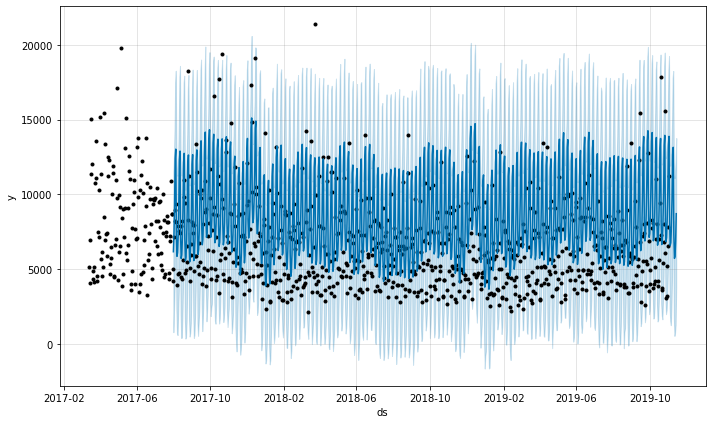

In [85]:
model.plot(forecast, uncertainty=True)
plt.show()

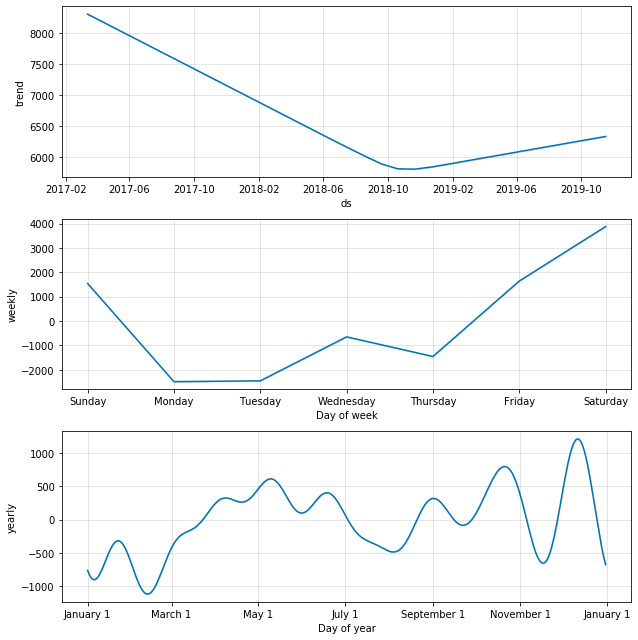

In [53]:
model.plot_components(forecast)
plt.show()

In [56]:
df2 = pd.read_csv('circ_sales.csv')

In [57]:
df2.head()

,Unnamed: 0,net_sales,30_day_sales_mean,Month,natural_log
0,2017-08-01,6728.97,NaN,8,8.814177
1,2017-08-02,8799.69,NaN,8,9.082472
2,2017-08-03,9432.39,NaN,8,9.151905
3,2017-08-04,13329.42,NaN,8,9.497729
4,2017-08-05,12139.54,NaN,8,9.404223


In [61]:
df2 = df2.rename(columns = {'Unnamed: 0': 'ds', 'net_sales': 'y'})

In [62]:
df2.head()

,ds,y,30_day_sales_mean,Month,natural_log
0,2017-08-01,6728.97,NaN,8,8.814177
1,2017-08-02,8799.69,NaN,8,9.082472
2,2017-08-03,9432.39,NaN,8,9.151905
3,2017-08-04,13329.42,NaN,8,9.497729
4,2017-08-05,12139.54,NaN,8,9.404223


In [64]:
df2.drop(['30_day_sales_mean', 'Month', 'natural_log'], axis=1, inplace=True)

In [65]:
df2.head()

,ds,y
0,2017-08-01,6728.97
1,2017-08-02,8799.69
2,2017-08-03,9432.39
3,2017-08-04,13329.42
4,2017-08-05,12139.54


In [162]:
model2 = proph(interval_width=0.95)

In [163]:
model2.add_country_holidays(country_name='US')
model2.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [161]:
model2.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [164]:
future_dates = model2.make_future_dataframe(periods=14, freq='D')
future_dates.tail()

,ds
831,2019-11-10
832,2019-11-11
833,2019-11-12
834,2019-11-13
835,2019-11-14


In [165]:
forecast = model2.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-01,9395.188435,1010.121612,11406.090286,9395.188435,9395.188435,0.0,0.0,0.0,0.0,...,-2588.840065,-2588.840065,-2588.840065,-519.544952,-519.544952,-519.544952,0.0,0.0,0.0,6286.803419
1,2017-08-02,9390.109892,2590.970952,12861.526228,9390.109892,9390.109892,0.0,0.0,0.0,0.0,...,-1446.347977,-1446.347977,-1446.347977,-511.125917,-511.125917,-511.125917,0.0,0.0,0.0,7432.635998
2,2017-08-03,9385.031348,4274.338948,14207.991002,9385.031348,9385.031348,0.0,0.0,0.0,0.0,...,624.003123,624.003123,624.003123,-508.247474,-508.247474,-508.247474,0.0,0.0,0.0,9500.786997
3,2017-08-04,9379.952805,7018.713713,17697.535721,9379.952805,9379.952805,0.0,0.0,0.0,0.0,...,3601.886432,3601.886432,3601.886432,-510.682611,-510.682611,-510.682611,0.0,0.0,0.0,12471.156626
4,2017-08-05,9374.874261,7701.476433,18456.713997,9374.874261,9374.874261,0.0,0.0,0.0,0.0,...,4212.476425,4212.476425,4212.476425,-518.088883,-518.088883,-518.088883,0.0,0.0,0.0,13069.261803


In [112]:
df2.head()

,ds,y
0,2017-08-01,6728.97
1,2017-08-02,8799.69
2,2017-08-03,9432.39
3,2017-08-04,13329.42
4,2017-08-05,12139.54


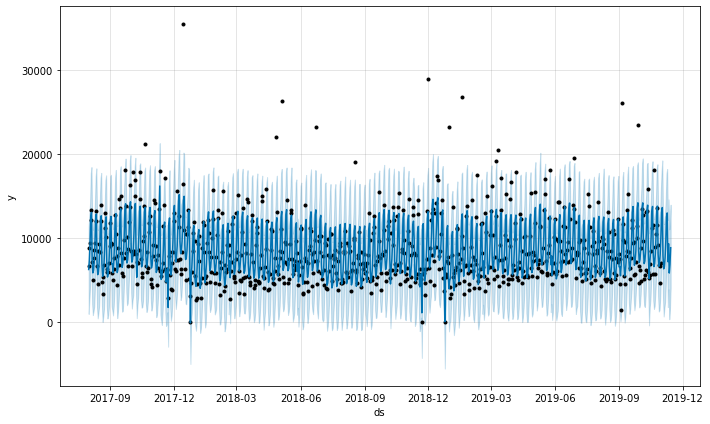

In [166]:
model2.plot(forecast, uncertainty=True)
plt.show()

In [143]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
831,2019-11-10,9067.431048,2075.110801,12564.162376,9064.353046,9069.966077,-1753.983493,-1753.983493,-1753.983493,-1428.059251,-1428.059251,-1428.059251,-325.924241,-325.924241,-325.924241,0.0,0.0,0.0,7313.447555
832,2019-11-11,9069.594087,389.218899,10915.244522,9065.954520,9072.509703,-3359.219658,-3359.219658,-3359.219658,-2886.695597,-2886.695597,-2886.695597,-472.524061,-472.524061,-472.524061,0.0,0.0,0.0,5710.374429
833,2019-11-12,9071.757126,556.567570,11235.250122,9067.750579,9075.054320,-3239.230170,-3239.230170,-3239.230170,-2621.707208,-2621.707208,-2621.707208,-617.522962,-617.522962,-617.522962,0.0,0.0,0.0,5832.526956
834,2019-11-13,9073.920165,1841.469014,12557.280795,9069.352554,9077.679347,-2201.796377,-2201.796377,-2201.796377,-1444.395096,-1444.395096,-1444.395096,-757.401281,-757.401281,-757.401281,0.0,0.0,0.0,6872.123789
835,2019-11-14,9076.083205,3432.844133,14165.497022,9070.877295,9080.333657,-377.917419,-377.917419,-377.917419,510.639441,510.639441,510.639441,-888.556859,-888.556859,-888.556859,0.0,0.0,0.0,8698.165786


ConversionError: Failed to convert value(s) to axis units: '2019-09-01'

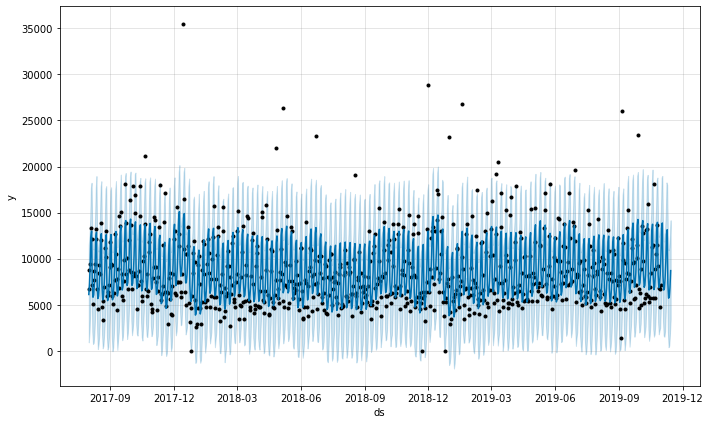

In [144]:
model2.plot(forecast)
plt.xlim('2019-09-01','2019-11-15')

TypeError: float() argument must be a string or a number, not 'Period'

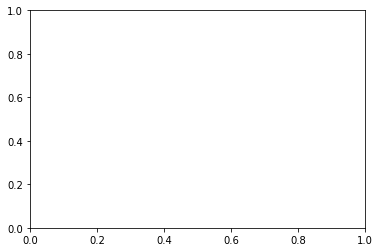

In [145]:
forecast.plot(x='ds',y='yhat')

In [99]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
845,2019-11-24,9097.713597,1587.360325,11804.924963,9088.710375,9107.798844,-2481.295359,-2481.295359,-2481.295359,-1428.059251,-1428.059251,-1428.059251,-1053.236107,-1053.236107,-1053.236107,0.0,0.0,0.0,6616.418238
846,2019-11-25,9099.876636,-354.858717,10414.409350,9090.357805,9110.766251,-3804.315077,-3804.315077,-3804.315077,-2886.695597,-2886.695597,-2886.695597,-917.619480,-917.619480,-917.619480,0.0,0.0,0.0,5295.561559
847,2019-11-26,9102.039675,450.799871,11153.248069,9091.834114,9113.696805,-3376.855561,-3376.855561,-3376.855561,-2621.707208,-2621.707208,-2621.707208,-755.148353,-755.148353,-755.148353,0.0,0.0,0.0,5725.184115
848,2019-11-27,9104.202714,2054.808644,12122.072207,9093.488167,9116.338388,-2012.586681,-2012.586681,-2012.586681,-1444.395096,-1444.395096,-1444.395096,-568.191586,-568.191586,-568.191586,0.0,0.0,0.0,7091.616033
849,2019-11-28,9106.365754,3719.309317,14664.021076,9094.852130,9118.953381,150.882320,150.882320,150.882320,510.639441,510.639441,510.639441,-359.757121,-359.757121,-359.757121,0.0,0.0,0.0,9257.248073


In [123]:
len(df2)

822

In [167]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model2, initial='800 days', period='90 days', horizon = '14 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-10-17 00:00:00 and 2019-10-17 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-10-18,13158.524171,7922.619387,18407.453699,11253.03,2019-10-17
1,2019-10-19,13795.843655,8459.068968,18904.575082,11523.27,2019-10-17
2,2019-10-20,8093.974899,2850.562787,12970.598448,5779.09,2019-10-17
3,2019-10-21,6508.541290,1218.209335,11502.097695,18097.35,2019-10-17
4,2019-10-22,7022.109295,1678.268029,11597.251103,5720.16,2019-10-17


In [168]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,coverage
0,1 days,3.630908e+06,1905.494171,1905.494171,0.169332,1.0
1,2 days,5.164591e+06,2272.573655,2272.573655,0.197216,1.0
2,3 days,5.358692e+06,2314.884899,2314.884899,0.400562,1.0
3,4 days,1.343005e+08,11588.808710,11588.808710,0.640359,0.0
4,5 days,1.695072e+06,1301.949295,1301.949295,0.227607,1.0
5,6 days,5.551634e+05,745.092855,745.092855,0.083703,1.0
6,7 days,5.340058e+04,231.085652,231.085652,0.022008,1.0
7,8 days,1.326573e+05,364.221542,364.221542,0.026759,1.0
8,9 days,5.660260e+06,2379.130075,2379.130075,0.206543,1.0
9,10 days,9.110310e+05,954.479434,954.479434,0.104271,1.0


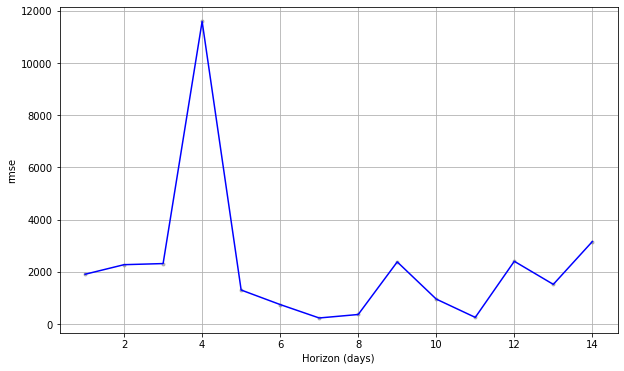

In [169]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

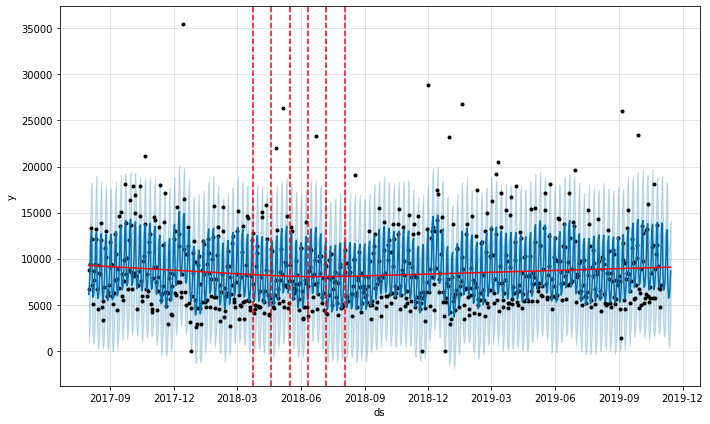

In [159]:
from fbprophet.plot import add_changepoints_to_plot
fig = model2.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model2, forecast)

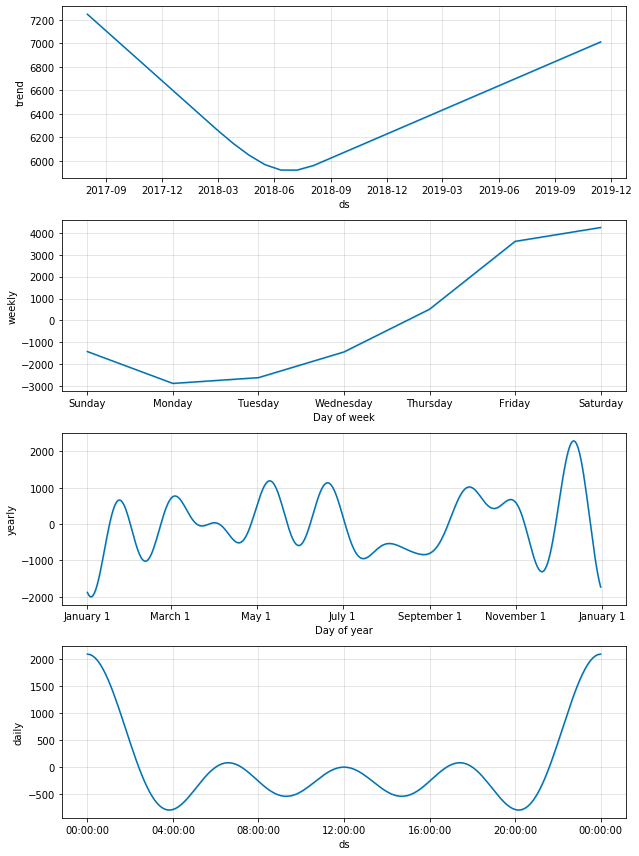

In [79]:
model2.plot_components(forecast)
plt.show()